# Problem Statement
Explore and identify different segments present in the customer transaction data.
DataSet
The dataset contains transactions on an e-commerce website between the period Feb 2018 to Feb 2019 from customers across different countries. 

File: transaction_data.csv
Columns

UserId 				- Unique identifier of a user.

TransactionId 			- Unique identifier of a transaction. If the same TransactionId is present in multiple rows, then all those products are bought together in the same transaction.

TransactionTime		- Time at which the transaction is performed

ItemCode			- Unique identifier of the product purchased

ItemDescription		- Simple description of the product purchased

NumberOfItemsPurchased	- Quantity of the product purchased in the transaction

CostPerItem			- Price per each unit of the product

Country			- Country from which the purchase is made.


## Importing Required Libraries.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv('Transaction_data.csv')

In [64]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [65]:
df.shape

(9999, 8)

In [66]:
df.isnull().sum()

UserId                     0
TransactionId              0
TransactionTime            0
ItemCode                   0
ItemDescription           26
NumberOfItemsPurchased     0
CostPerItem                0
Country                    0
dtype: int64

In [67]:
df.Country.unique()

array(['United Kingdom', 'France', 'Austria', 'Australia', 'EIRE',
       'Portugal', 'Germany', 'Sweden', 'Cyprus', 'Spain', 'Japan',
       'Belgium', 'Singapore', 'Denmark', 'Netherlands', 'Norway',
       'Canada', 'Iceland', 'Switzerland', 'Poland', 'Finland',
       'Hong Kong', 'Italy', 'Malta', 'Israel', 'Channel Islands',
       'Unspecified', 'USA', 'Czech Republic', 'Lebanon', 'Brazil',
       'European Community', 'Greece', 'RSA'], dtype=object)

## Replacing irrelevant UserID (-1) with 'Unknown_ID'.

In [68]:
df['UserId'].replace({-1:'Unknown_ID'},inplace=True)

In [69]:
df.Country.nunique()

34

### Creating new feature of Year of Transaction (YOT) from TransactionTime (either 2018 or 2019).

In [70]:
df['YOT']=0
for i in range(len(df.TransactionTime)):
    df['YOT'][i]= df.TransactionTime[i].split(' ')[5]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Creating new feature of  'total_spent'  by multiplying 'Numberofitemspurchased' and 'CostperItem'.

In [71]:
df['total_spent']=df['NumberOfItemsPurchased']*df['CostPerItem']

In [72]:
df.YOT.value_counts()

2018    7468
2019    2478
2028      53
Name: YOT, dtype: int64

### Replacing error year 2028 with 2018 in the column feature 'YOT'.

In [73]:
df['YOT'].replace({2028:2018},inplace=True)

### FIlling missing string descritiption values with empty string '  '

In [74]:
df['ItemDescription'].fillna(' ',inplace=True)

### Creating new feature 'returning_customer' that contains either 0 for one time customers and 1 for returning customers.

In [75]:
df['returning_customer']=0
ret_cust=(df['UserId'].value_counts()>1).values
for i in range(len(ret_cust)) :
    if ret_cust[i]:
        df['returning_customer'][i]=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [76]:
df['returning_customer'].value_counts()

0    8574
1    1425
Name: returning_customer, dtype: int64

## Treating Less Frequently occuring values in 'Countries'.

In [77]:
df.nunique()

UserId                    2378
TransactionId             6110
TransactionTime           5967
ItemCode                  2241
ItemDescription           2422
NumberOfItemsPurchased     128
CostPerItem                230
Country                     34
YOT                          2
total_spent               1109
returning_customer           2
dtype: int64

#### Below we can see that there are many countries with less than 25 number of occurences. So we can include them into a single variable named 'others' before performing one_hot_encoding to avoid SPARSE CLASSES.

In [78]:
df['Country'].value_counts()

United Kingdom        9149
France                 175
Germany                167
EIRE                   130
Spain                   54
Switzerland             38
Belgium                 38
Portugal                36
Netherlands             34
Australia               26
Norway                  25
Channel Islands         19
Cyprus                  14
Japan                   13
Italy                    9
Israel                   8
Canada                   8
Austria                  8
Denmark                  7
Sweden                   6
Singapore                5
Poland                   5
Finland                  4
USA                      4
Unspecified              3
Czech Republic           3
Malta                    2
Lebanon                  2
Iceland                  2
Hong Kong                1
RSA                      1
Brazil                   1
European Community       1
Greece                   1
Name: Country, dtype: int64

In [79]:
temp=df['Country'].value_counts()
temp.head()

United Kingdom    9149
France             175
Germany            167
EIRE               130
Spain               54
Name: Country, dtype: int64

In [80]:
df['Country_Count']=df['Country'].apply(lambda x:temp[x])
df[['Country','Country_Count']].head()

,Country,Country_Count
0,United Kingdom,9149
1,United Kingdom,9149
2,France,175
3,United Kingdom,9149
4,United Kingdom,9149


In [81]:
for i in range(len(df)):
    if df['Country_Count'][i]<25:
        df['Country'][i]='others'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,YOT,total_spent,returning_customer,Country_Count
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019,70.38,1,9149
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018,10.56,1,9149
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019,64.80,1,175
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018,5.19,1,9149
4,Unknown_ID,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018,10.20,1,9149


## Performing one_hot_encoding of 'Countries' feature.

In [83]:
country=pd.get_dummies(df['Country'])

In [84]:
df=pd.concat([df,country],axis=1)

## Performing Label_Encoding of 'YOT' (year of transaction) feature.

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
df['YOT']= label_encoder.fit_transform(df['YOT'])


In [86]:
df.YOT.value_counts()

0    7521
1    2478
Name: YOT, dtype: int64

In [87]:
df.columns

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country',
       'YOT', 'total_spent', 'returning_customer', 'Country_Count',
       'Australia', 'Belgium', 'EIRE', 'France', 'Germany', 'Netherlands',
       'Norway', 'Portugal', 'Spain', 'Switzerland', 'United Kingdom',
       'others'],
      dtype='object')

## Descriptive Analysis.

In [88]:
df.describe()

,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem,YOT,total_spent,returning_customer,Country_Count,Australia,Belgium,EIRE,France,Germany,Netherlands,Norway,Portugal,Spain,Switzerland,United Kingdom,others
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.161301e+06,6.573154e+05,29.099310,6.286740,0.247825,77.481224,0.142514,8379.875288,0.002600,0.003800,0.013001,0.017502,0.016702,0.003400,0.002500,0.003600,0.005401,0.003800,0.914991,0.012701
std,1.476092e+05,4.527845e+05,111.552006,79.139871,0.431771,338.306524,0.349594,2523.533448,0.050929,0.061533,0.113285,0.131138,0.128158,0.058216,0.049942,0.059898,0.073293,0.061533,0.278908,0.111988
min,5.900070e+06,-1.000000e+00,-4530.000000,0.000000,0.000000,-18771.780000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.029793e+06,4.606770e+05,3.000000,1.730000,0.000000,15.540000,0.000000,9149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.170186e+06,4.752300e+05,9.000000,2.900000,0.000000,40.950000,0.000000,9149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.290356e+06,4.887330e+05,33.000000,5.700000,0.000000,72.360000,0.000000,9149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.397435e+06,1.894494e+06,4800.000000,6257.260000,1.000000,13065.660000,1.000000,9149.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## We can see that there are there are few negative values in 'NumberOfItemsPurchased' and 'total_spent' features, we must convert them to positive values to make sense.

In [89]:
temp=(df['NumberOfItemsPurchased']<0).values
for i in range(len(temp)) :
    if temp[i]:
        df['NumberOfItemsPurchased'][i]*=-1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [90]:
temp=(df['total_spent']<0).values
for i in range(len(temp)) :
    if temp[i]:
        df['total_spent'][i]*=-1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# EDA Visualizations

### 1. Scatter Plot.

Text(0.5, 0, 'Number of items purchased')

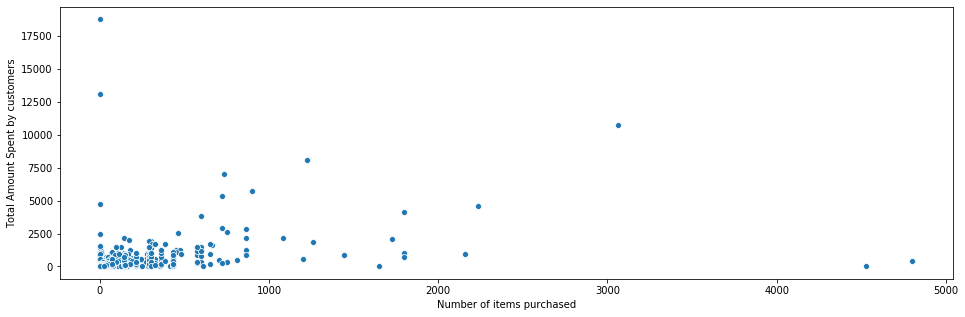

In [91]:
plt.figure(figsize=(16,5))
sns.scatterplot(y=df['total_spent'],x=df['NumberOfItemsPurchased'])
plt.ylabel('Total Amount Spent by customers')
plt.xlabel('Number of items purchased')

## Inference :
#### 1. We can conclude that more number of items are purchased for which he total amount falls below 2500 amount. 
#### 2. The highest amount spent by any customer is around 18000.
#### 3. As the total amount increases the number of items bought decreases. Since We can see only few items being bought above 2500 amount.

([<matplotlib.axis.XTick at 0x201cb233708>,
 <a list of 2 Text xticklabel objects>)

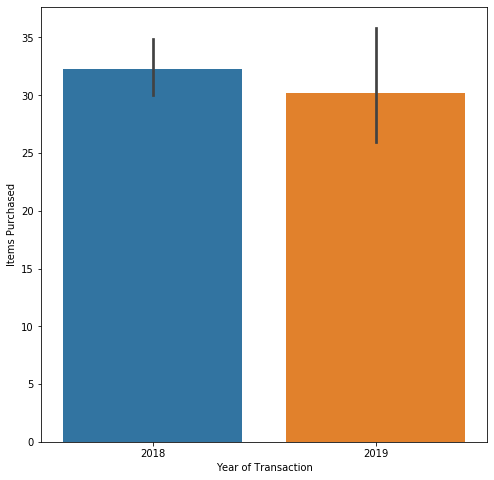

In [92]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['YOT'],y=df['NumberOfItemsPurchased'])
plt.xlabel('Year of Transaction')
plt.ylabel('Items Purchased')
plt.xticks(ticks=[0,1],labels=[2018,2019])

## Inference:
#### 1. We can infer that more number of items were purchased in the year 2018 as compared to 2018.

([<matplotlib.axis.XTick at 0x201cb28ea48>,
 <a list of 2 Text xticklabel objects>)

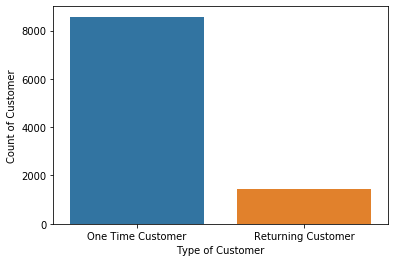

In [93]:
sns.countplot(df['returning_customer'])
plt.xlabel('Type of Customer')
plt.ylabel('Count of Customer')
plt.xticks(ticks=[0,1],labels=['One Time Customer','Returning Customer'])

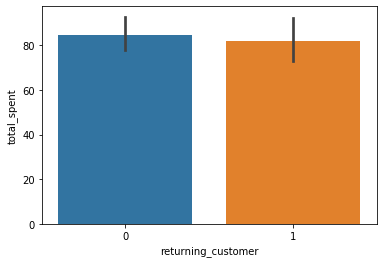

In [94]:
sns.barplot(x=df['returning_customer'],y=df['total_spent'])

Text(0.5, 0, 'Number of items purchased')

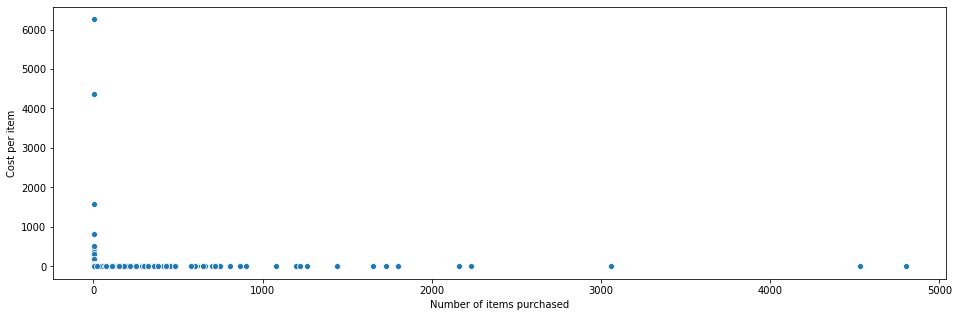

In [95]:
plt.figure(figsize=(16,5))
sns.scatterplot(y=df['CostPerItem'],x=df['NumberOfItemsPurchased'])
plt.ylabel('Cost per item')
plt.xlabel('Number of items purchased')

## Inference:
### 1. We can conclude that there are very few items bought by customers which have very high cost per item.
### 2. More number of items are bought with low cost per item.

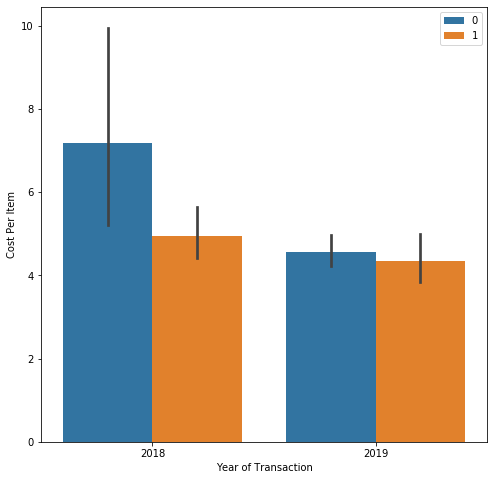

In [96]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['YOT'],y=df['CostPerItem'],hue=df['returning_customer'])
plt.xlabel('Year of Transaction')
plt.ylabel('Cost Per Item')
plt.xticks(ticks=[0,1],labels=[2018,2019])
plt.legend()

## Inference :
### 1. We can conclude that out of the items bought cost per item in the year 2018 was compratively higher than 2019.

In [97]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,YOT,total_spent,...,EIRE,France,Germany,Netherlands,Norway,Portugal,Spain,Switzerland,United Kingdom,others
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,1,70.38,...,0,0,0,0,0,0,0,0,1,0
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,0,10.56,...,0,0,0,0,0,0,0,0,1,0
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,1,64.80,...,0,1,0,0,0,0,0,0,0,0
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,0,5.19,...,0,0,0,0,0,0,0,0,1,0
4,Unknown_ID,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,0,10.20,...,0,0,0,0,0,0,0,0,1,0


## Feature Transformations to form Gaussian Distribution.

## 1. Log Transformation.

In [98]:
df['total_spent']=np.log1p(df['total_spent'])

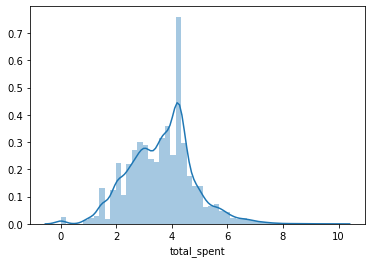

In [99]:
sns.distplot(df['total_spent'])

## 2. Square Root Transformation.

In [100]:
df['NumberOfItemsPurchased']=np.sqrt(df['NumberOfItemsPurchased'])

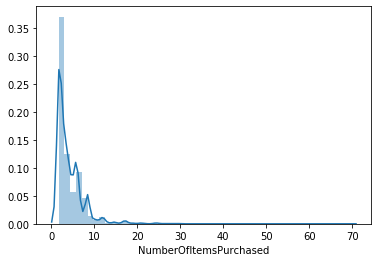

In [101]:
sns.distplot(df['NumberOfItemsPurchased'])

## 3. Log Transformation

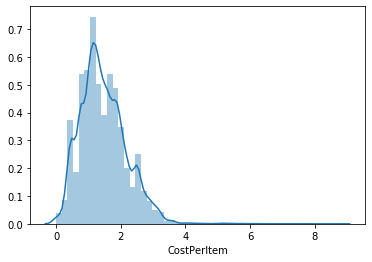

In [102]:
df['CostPerItem']=np.log1p(df['CostPerItem'])
sns.distplot(df['CostPerItem'])

## Finalizing our Dataset for performing KMeans Clustering.

In [103]:
user_id=df['UserId']
df.drop(['TransactionId','TransactionTime','ItemDescription','Country','ItemCode','UserId','Country_Count'],axis=1,inplace=True)

In [104]:
df.head()

,NumberOfItemsPurchased,CostPerItem,YOT,total_spent,returning_customer,Australia,Belgium,EIRE,France,Germany,Netherlands,Norway,Portugal,Spain,Switzerland,United Kingdom,others
0,2.449490,2.543961,1,4.268018,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.732051,1.508512,0,2.447551,1,0,0,0,0,0,0,0,0,0,0,1,0
2,8.485281,0.641854,1,4.186620,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1.732051,1.004302,0,1.822935,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1.732051,1.481605,0,2.415914,1,0,0,0,0,0,0,0,0,0,0,1,0


# K-Means Clustering.

In [105]:
from sklearn.cluster import KMeans

In [106]:
SSE_scaled=[]
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(df)
    SSE_scaled.append(kmeans.inertia_)

# ELBOW PLOT.
### To determine most efficient value for 'k'.

Text(0, 0.5, 'SSE')

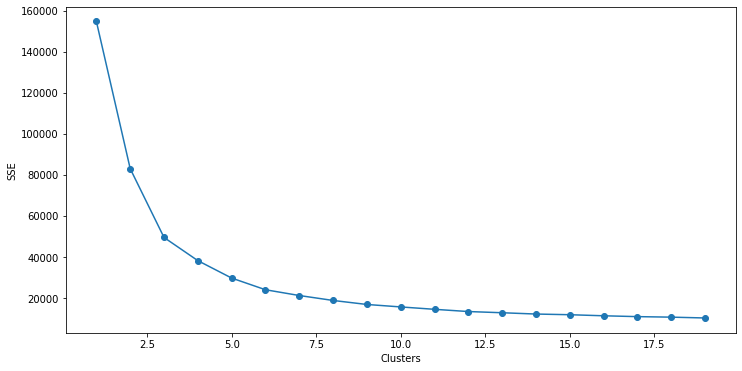

In [107]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

### We consider k=5 as optimum value for performing KMeans Clustering.

In [121]:
kmeans = KMeans(n_jobs = -1, n_clusters = 6)
kmeans.fit(df)
pred = kmeans.predict(df)

In [122]:
pred

array([0, 2, 1, ..., 2, 0, 4])

In [123]:
frame = pd.DataFrame(df)

In [124]:
frame['cluster'] = pred

In [125]:
frame['cluster'].value_counts()

0    3690
2    3066
4    1958
1     895
5     336
3      54
Name: cluster, dtype: int64

In [126]:
frame=pd.concat([frame,user_id],axis=1)
frame.head()

,NumberOfItemsPurchased,CostPerItem,YOT,total_spent,returning_customer,Australia,Belgium,EIRE,France,Germany,Netherlands,Norway,Portugal,Spain,Switzerland,United Kingdom,others,cluster,UserId
0,2.449490,2.543961,1,4.268018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,278166
1,1.732051,1.508512,0,2.447551,1,0,0,0,0,0,0,0,0,0,0,1,0,2,337701
2,8.485281,0.641854,1,4.186620,1,0,0,0,1,0,0,0,0,0,0,0,0,1,267099
3,1.732051,1.004302,0,1.822935,1,0,0,0,0,0,0,0,0,0,0,1,0,2,380478
4,1.732051,1.481605,0,2.415914,1,0,0,0,0,0,0,0,0,0,0,1,0,2,Unknown_ID


In [127]:
user_cluster=frame[['UserId','cluster']]

In [128]:
kmeans.inertia_

27788.851922839738

# Checking Correlation among variables.

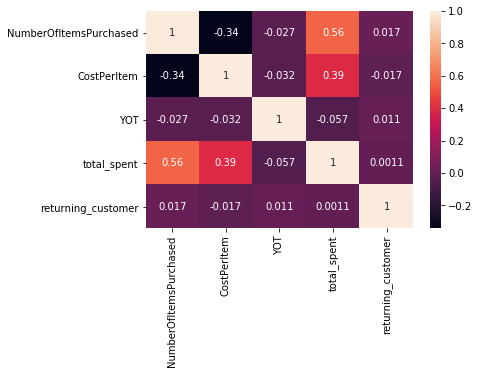

In [129]:
sns.heatmap(df.iloc[:,:5].corr(), annot = True) 

In [130]:
df.nunique()

NumberOfItemsPurchased    100
CostPerItem               230
YOT                         2
total_spent               986
returning_customer          2
Australia                   2
Belgium                     2
EIRE                        2
France                      2
Germany                     2
Netherlands                 2
Norway                      2
Portugal                    2
Spain                       2
Switzerland                 2
United Kingdom              2
others                      2
cluster                     6
dtype: int64

# Dimensionality Reduction using PCA.
To perform EDA analysis, we need to reduce dimensionality of multivariate data we have to trivariate/bivairate(2D/3D) data. We can achieve this task using PCA(Principal Component Analysis).

In [131]:
from sklearn.decomposition import PCA
pca = PCA(2) 
pca.fit(df) 
pca_data = pd.DataFrame(pca.transform(df)) 
  
print(pca_data.head())

          0         1
0 -2.085909  1.728423
1 -2.629858 -1.047539
2  4.039351  1.142872
3 -2.708629 -1.399330
4 -2.633757 -1.065726


# Plotting scatterplot to visualize Customer Segmentation.

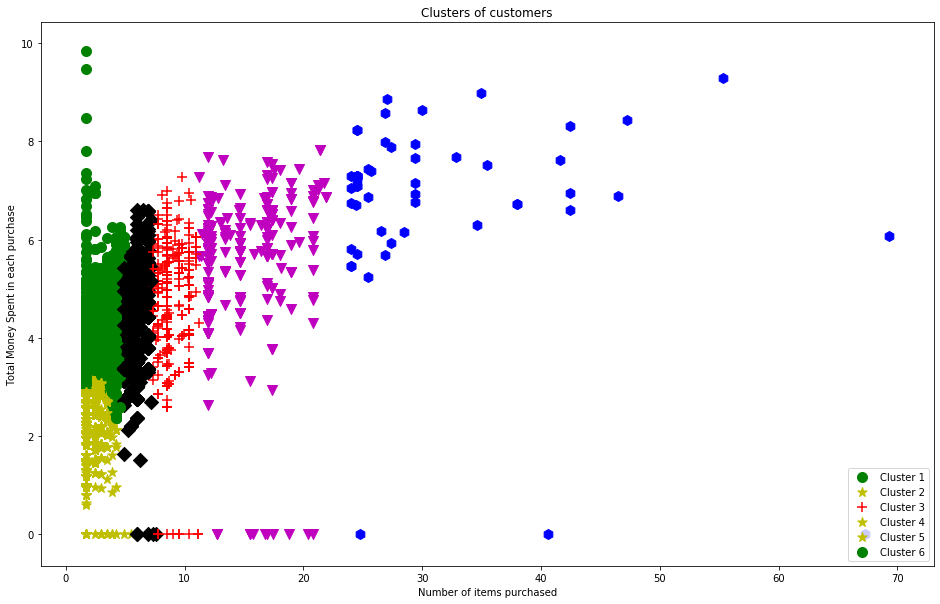

In [134]:
plt.figure(figsize=(16,10))
for i in range(0, df.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(x=df.loc[i,'NumberOfItemsPurchased'],y=df.loc[i,'total_spent'],s=100,c='r',marker='+',label='Cluster 1')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(x=df.loc[i,'NumberOfItemsPurchased'],y=df.loc[i,'total_spent'],s=100,c='g',marker='o',label='Cluster 2')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(x=df.loc[i,'NumberOfItemsPurchased'],y=df.loc[i,'total_spent'],s=100,c='y',marker='*',label='Cluster 3')
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(x=df.loc[i,'NumberOfItemsPurchased'],y=df.loc[i,'total_spent'],s=100,c='b',marker='h',label='Cluster 4')
    elif kmeans.labels_[i] == 4:
        c5 = plt.scatter(x=df.loc[i,'NumberOfItemsPurchased'],y=df.loc[i,'total_spent'],s=100,c='k',marker='D',label='Cluster 5')
    elif kmeans.labels_[i] == 5:
        c6 = plt.scatter(x=df.loc[i,'NumberOfItemsPurchased'],y=df.loc[i,'total_spent'],s=100,c='m',marker='v',label='Cluster 6')    
plt.title('Clusters of customers')
plt.xlabel('Number of items purchased')
plt.ylabel('Total Money Spent in each purchase')
plt.legend(loc='lower right', labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'])
plt.show()

# UserIds belonging to each cluster.

In [133]:
user_cluster.head(50)

,UserId,cluster
0,278166,0
1,337701,2
2,267099,1
3,380478,2
4,Unknown_ID,2
5,285957,0
6,345954,0
7,Unknown_ID,1
8,339822,4
9,328440,4
